In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

In [16]:
pd.set_option('display.max_rows', None)

In [17]:
final_villagers= pd.read_csv('villagers_acnh_votes_combined.csv')

In [18]:
final_villagers.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total_Google_Searches,Poll_Results,Overall_Popularity
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3,2417200.0,632.0,2417832.0
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5,2664010.0,1225.0,2665235.0
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP,4731450.0,2535.0,4733985.0
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC,1618750.0,600.0,1619350.0
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE,913600.0,1230.0,914830.0


In [19]:
final_villagers.Personality.unique()

array(['Cranky', 'Peppy', 'Big Sister', 'Lazy', 'Normal', 'Snooty',
       'Jock', 'Smug'], dtype=object)

In [8]:
gender_personality = final_villagers.groupby(['Gender','Personality']).size().reset_index(name = 'count')

In [20]:
gender_personality

,Gender,Personality,count
0,Female,Big Sister,24
1,Female,Normal,59
2,Female,Peppy,49
3,Female,Snooty,55
4,Male,Cranky,55
5,Male,Jock,55
6,Male,Lazy,60
7,Male,Smug,34


In [21]:
#Word Cloud for popular personality traits:
#Gender variable [nominal variable as color of word]
#Personality trait variable [as quantitative sum + size of word]


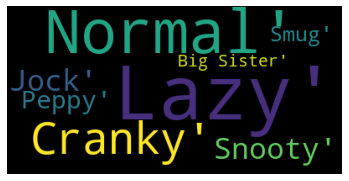

In [23]:
text = final_villagers['Personality'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

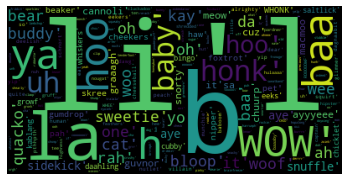

In [24]:
text2 = final_villagers['Catchphrase'].values 

wordcloud = WordCloud().generate(str(text2))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [25]:
top15overall=final_villagers.sort_values(by =['Overall_Popularity'], ascending = False)[0:14]

In [26]:
top15overall.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total_Google_Searches,Poll_Results,Overall_Popularity
87,Clay,Hamster,Male,Lazy,Nature,19-Oct,thump,K.K. Safari,Elegant,Simple,Beige,Brown,dig-site wall,dig-site flooring,3675;343;343;1430;295;3398;303;4073;7393;3398;...,ham05,K9s2bvx54sfHw8mZ8,19218150.0,3425.0,19221575.0
256,Olive,Cub,Female,Normal,Nature,12-Jul,sweet pea,Neapolitan,Simple,Simple,Brown,Yellow,white simple-cloth wall,mint dot flooring,2605;4125;3490;1783;7134;3584;8826;7329;3438;2...,cbr09,7ZynzrsbeH5fMqvLu,12937100.0,751.0,12937851.0
12,Ankha,Cat,Female,Snooty,Nature,22-Sep,me meow,K.K. Bazaar,Gorgeous,Simple,Colorful,Brown,ancient wall,pyramid tile,3472;8608;5165;8825;3774;8825;8825;3065;3810,cat19,AWdRRws22EGTxC7vc,7264000.0,13038.0,7277038.0
121,Drift,Frog,Male,Jock,Fitness,9-Oct,dribbit,K.K. Metal,Simple,Active,Orange,Red,gray shanty wall,skull-print flooring,941;3563;8417;3943;3200;3194;3196;132;4757;1288,flg04,gf6jM4si5zSEFjf9w,6695950.0,525.0,6696475.0
309,Rocket,Gorilla,Female,Big Sister,Fitness,14-Apr,vroom,K.K. Adventure,Active,Cool,Pink,Red,skyscraper wall,monochromatic tile flooring,7845;4013;7348;7348;7235;1241;1598;7133;7535;7...,gor09,eJNBB5SYzfj5DaWjx,6068350.0,329.0,6068679.0


In [27]:
top15ACPPoll=final_villagers.sort_values(by =['Poll_Results'], ascending = False)[0:14]

In [28]:
top15ACPPoll.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID,Total_Google_Searches,Poll_Results,Overall_Popularity
228,Marshal,Squirrel,Male,Smug,Music,29-Sep,sulky,K.K. Bossa,Elegant,Cool,Light blue,Blue,blue delicate-blooms wall,modern wood flooring,2554;1081;3681;9766;1161;3615;1845;8394;3271;3...,squ17,ZZJJbE5zFrcDXfLEF,1136850.0,29787.0,1166637.0
298,Raymond,Cat,Male,Smug,Nature,1-Oct,crisp,K.K. Cruisin',Elegant,Cool,Black,Gray,office wall,monochromatic tile flooring,840;4116;1750;3590;1232;832;3560;839;3784;1744...,cat23,2nbzgWsuDBSN2LeEj,4906350.0,27778.0,4934128.0
329,Sherb,Goat,Male,Lazy,Nature,18-Jan,bawwww,Hypno K.K.,Simple,Cute,Gray,Blue,purple desert-tile wall,simple purple flooring,3995;4002;7133;3998;3624;3997;4000;4003;4111,goa09,XaaDkAfHynrEY2YS4,5608850.0,19883.0,5628733.0
390,Zucker,Octopus,Male,Lazy,Nature,8-Mar,bloop,Spring Blossoms,Simple,Cute,Blue,Yellow,chain-link fence,backyard lawn,4042;4412;7526;4077;4077;3064;4077;3946;3617;3...,ocp02,2F5tipHqgmWvWXTLC,2512500.0,17442.0,2529942.0
186,Judy,Cub,Female,Snooty,Music,10-Mar,myohmy,K.K. Lullaby,Cute,Elegant,Pink,White,starry wall,blue dot flooring,6827;6827;6827;6827;1557;6827;6827;1565;6827;3...,cbr19,nEbMBNS4EztR8Ysxv,4686500.0,14741.0,4701241.0


In [29]:
fin_vil2 = final_villagers.drop(columns=['Wallpaper', 'Flooring',
                                                        'Furniture List','Filename',
                                                        'Unique Entry ID','Style 2','Color 2'])

In [30]:
fin_vil2.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Color 1,Total_Google_Searches,Poll_Results,Overall_Popularity
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Black,2417200.0,632.0,2417832.0
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Blue,2664010.0,1225.0,2665235.0
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Pink,4731450.0,2535.0,4733985.0
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Red,1618750.0,600.0,1619350.0
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Red,913600.0,1230.0,914830.0


<AxesSubplot:xlabel='Poll_Results', ylabel='Total_Google_Searches'>

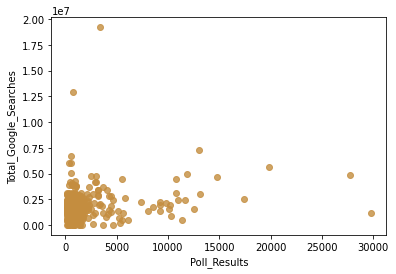

In [31]:
#sns.pairplot(FinVillagers_ACNH2)
sns.regplot(y=fin_vil2["Total_Google_Searches"], x=fin_vil2["Poll_Results"],
           color='#c48d3f',fit_reg=False)
#sns.plt.show()

In [32]:
personality_species = final_villagers.groupby(['Species', 'Personality'])['Overall_Popularity'].sum().unstack().fillna(0)

In [33]:
personality_species

Personality,Big Sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty
Species,,,,,,,,
Alligator,0.0,1086648.0,3717833.0,4059309.0,1807134.0,0.0,0.0,2022403.0
Anteater,0.0,1769126.0,526085.0,0.0,2080636.0,5012798.0,1944223.0,2994871.0
Bear,4624252.0,8637966.0,1813437.0,2225242.0,2786335.0,3494773.0,1928902.0,0.0
Bird,0.0,2417832.0,4009982.0,6410224.0,1738875.0,3683394.0,2921832.0,78828.0
Bull,0.0,3852603.0,1879055.0,3175378.0,0.0,0.0,0.0,0.0
Cat,2303274.0,6755173.0,3263189.0,2810488.0,5523681.0,7368853.0,4934128.0,15259796.0
Chicken,4198743.0,773626.0,502220.0,3575690.0,2590344.0,0.0,568193.0,2612342.0
Cow,0.0,0.0,0.0,0.0,2524662.0,2598255.0,0.0,4669423.0
Cub,3006443.0,3375015.0,2420770.0,7889166.0,18096684.0,3016630.0,0.0,4701241.0


In [34]:
# personality_overall = final_villagers.groupby(['Personality'])['Overall_Popularity'].transform('sum').fillna(0)

In [35]:
final_villagers['Overall_Popularity'] = final_villagers[['Overall_Popularity']].astype('int64')

In [36]:
personality_overall = final_villagers.groupby(['Personality'])
personality_overall = personality_overall[['Overall_Popularity']].sum().add_prefix('Sum_of_')

In [37]:
personality_overall

,Sum_of_Overall_Popularity
Personality,
Big Sister,55466139
Cranky,91762446
Jock,99641958
Lazy,130585526
Normal,122477521
Peppy,91630604
Smug,56405235
Snooty,94506116


In [38]:
personality_overall.apply(lambda x: x/x.sum()).reset_index() # type: ignore

,Personality,Sum_of_Overall_Popularity
0,Big Sister,0.074704
1,Cranky,0.123590
2,Jock,0.134202
3,Lazy,0.175879
4,Normal,0.164958
5,Peppy,0.123412
6,Smug,0.075969
7,Snooty,0.127285


Text(0.5, 0, 'Species and Personality')

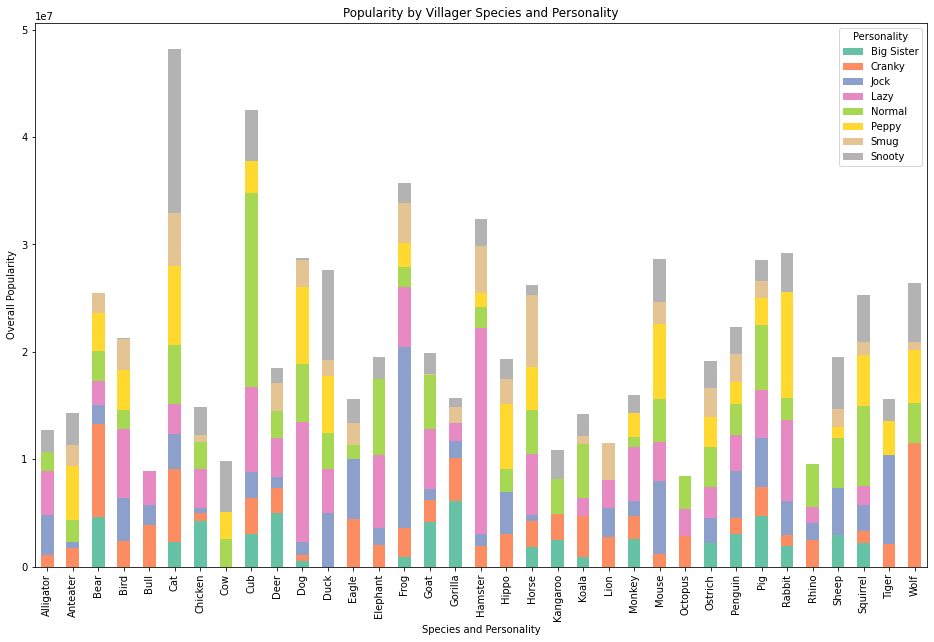

In [39]:
# Very simple one-liner using our agg_tips DataFrame.
personality_species.plot(kind='bar', stacked=True,figsize = (16,10),rot = 90,colormap = 'Set2',
                        grid=False,title = 'Popularity by Villager Species and Personality',
                       )

# Just add a title and rotate the x-axis labels to be horizontal.
plt.ylabel('Overall Popularity')
plt.xlabel('Species and Personality')
#plt.xticks(rotation=0, ha='center')
#plt.figure(figsize = (16,20))

In [41]:
#Stacked bar chart:
#Villager species variable [as ordinal rank/order of species x axis & gender bar stack color]
#Total rank by villager species [quantitative variable as sum on y axis]
#JS Note, they look a bit better unstacked

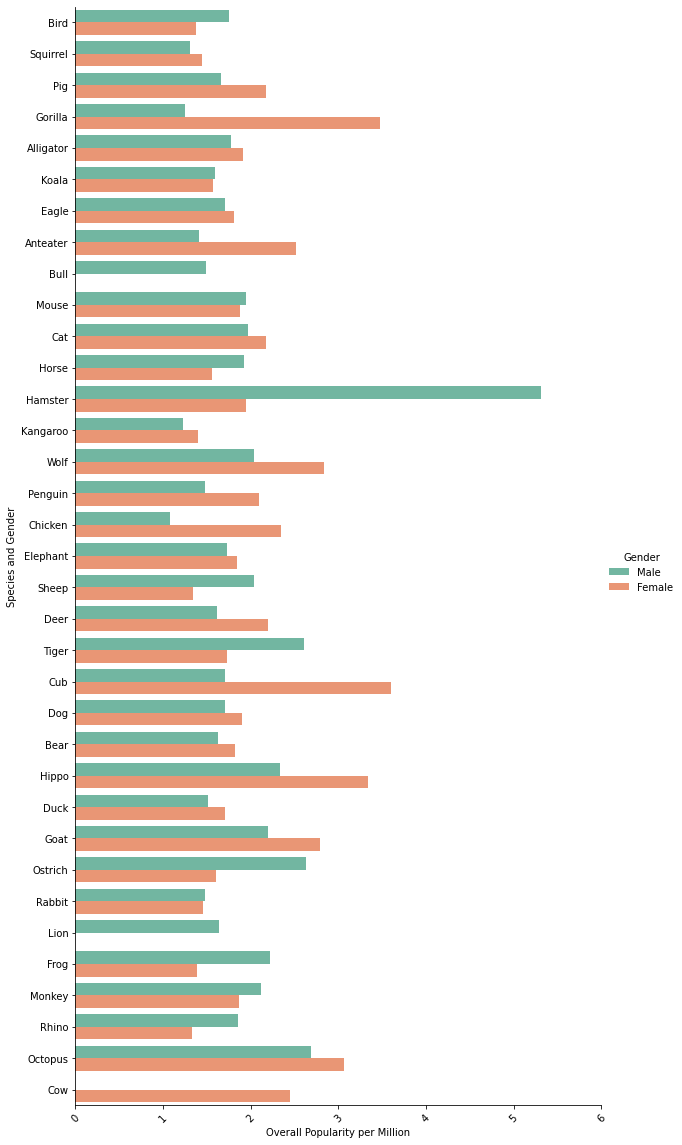

In [42]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=final_villagers, kind="bar",
    y="Species", x="Overall_Popularity", hue="Gender",
    #order=Final_Villagers_ACNH.sort_values('Species',ascending = False).Overall_Popularity,
    ci =None,palette="Set2", alpha=1, height=16,aspect=14.7/27.27
)
#g.despine(right=True)
#g.title('Overall Popularity from combined Historical Google Searches and ACP Poll Results by Species and Gender')
g.set_axis_labels("Overall Popularity per Million", "Species and Gender")
g.legend.set_title("Gender")
g.set_xticklabels(rotation=45)
#plt.xticks(rotation=45)
#sns.set(rc={'figure.figsize':(40.7,20.27)})

In [43]:
species_gender = final_villagers.groupby(['Species','Gender'])['Overall_Popularity'].sum().unstack().fillna(0)

In [44]:
species_gender

Gender,Female,Male
Species,,
Alligator,3829537.0,8863790.0
Anteater,10088305.0,4239434.0
Bear,10905360.0,14605547.0
Bird,5501097.0,15759870.0
Bull,0.0,8907036.0
Cat,30455604.0,17762978.0
Chicken,9401429.0,5419729.0
Cow,9792340.0,0.0
Cub,28820998.0,13684951.0


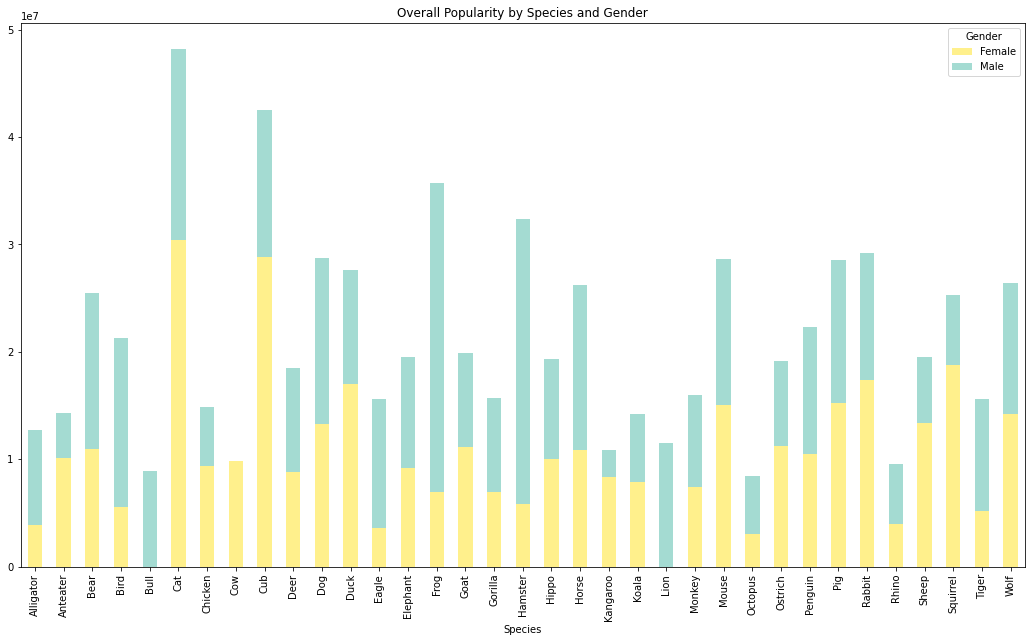

In [45]:
# Draw a nested barplot by species and sex
gv2 = species_gender.plot(
    kind="bar",stacked=True,
    alpha=0.8,colormap = 'Set3_r',
    title = 'Overall Popularity by Species and Gender',
    figsize = (18,10), grid = False
)
#g.despine(right=True)
#g.title('Overall Popularity from combined Historical Google Searches and ACP Poll Results by Species and Gender')
#gv2.set_axis_labels("Overall Popularity per Million", "Species and Gender")
#gv2.legend.set_title("Gender")
#gv2.set_xticklabels(rotation=45)
#plt.xticks(rotation=45)
#sns.set(rc={'figure.figsize':(40.7,20.27)})

In [46]:
personality_gender = final_villagers.groupby(['Personality','Gender'])['Overall_Popularity'].sum().unstack().fillna(0)

In [47]:
personality_gender

Gender,Female,Male
Personality,,
Big Sister,55466139.0,0.0
Cranky,0.0,91762446.0
Jock,0.0,99641958.0
Lazy,0.0,130585526.0
Normal,122477521.0,0.0
Peppy,91630604.0,0.0
Smug,0.0,56405235.0
Snooty,94506116.0,0.0


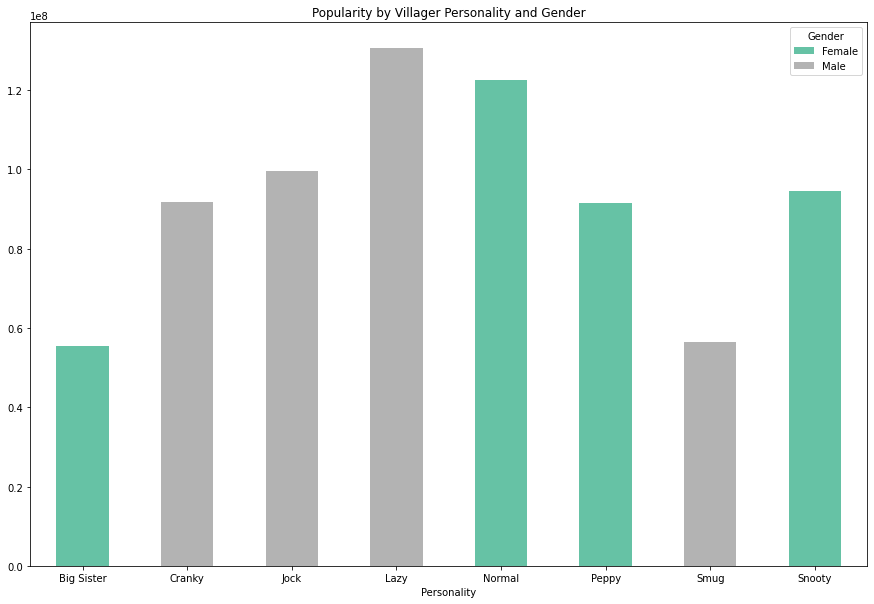

In [48]:
# Very simple one-liner using our personality_gender DataFrame.
p = personality_gender.plot(kind='bar', stacked=True,figsize = (15,10),rot = 0,
                           title = 'Popularity by Villager Personality and Gender',
                           grid = False,colormap = 'Set2')

# Just add a title and rotate the x-axis labels to be horizontal.
#plt.xticks(rotation=0, ha='center')
#plt.figure(figsize = (10,15))
#p.sns.set(rc={'figure.figsize':(40.7,20.27)})

In [49]:
piedata = final_villagers.groupby(final_villagers['Gender']).size().reset_index()

In [50]:
piedata = piedata.rename(columns={0:'Count'})

In [51]:
piedata.set_index("Gender")

,Count
Gender,
Female,187
Male,204


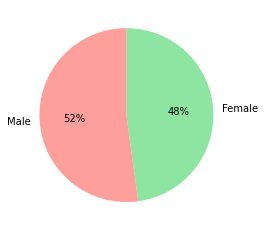

<Figure size 576x720 with 0 Axes>

In [52]:
#Pie chart by villager genders:
#Gender variable [nominal categorical as color & quantitative as count]

piedata1 = piedata['Count'].tolist()
labels = ['Female', 'Male']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[2:4]

#create pie chart
plt.pie(piedata1, labels = labels,counterclock=False,colors = colors, autopct='%.0f%%',
       startangle = 90)
plt.figure(figsize = (8,10))
plt.show()

In [53]:
#Bubble chart:
#Species of villagers variable [nominal categorical variable]
#Top ten villager popularity for each gender [color + size]

In [54]:
top10ACPPoll=final_villagers.sort_values(by =['Poll_Results'], ascending = False)[0:10]

In [55]:
top10google=final_villagers.sort_values(by =['Total_Google_Searches'], ascending = False)[0:10]

In [56]:
top10acplist= top10ACPPoll['Name'].tolist()
top10googlelist = top10google['Name'].tolist()

In [57]:
merge10list= top10acplist + top10googlelist
merge10finallist= set(merge10list)
mergelistdf= pd.DataFrame(merge10finallist)

In [58]:
final_overallpop_df = mergelistdf.merge(final_villagers,left_on=0,right_on='Name',how='left')

In [59]:
fig2 = px.bar(personality_species, color="Personality",title= "Popular Villagers: What Species are they?",
              color_discrete_sequence=px.colors.qualitative.Plotly_r,orientation='h')
fig2.update_traces(textfont_size=18,width=0.85)
fig2.update_layout(font=dict(size=20),title_font_size=24,legend_font_size=19,width=1000,height=600,font_family="Courier",yaxis_title="Villager Species",xaxis_title="Overall Popularity (Google Searches + ACNH Polls)")
fig2.update_layout(height=1000,width=890,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig2.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig2.update_layout(
    title={
        'text': "Popular Villagers : By Species & Personality",
        'y':0.95,
        'x':0.5})
fig2.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})
fig2.show()

In [60]:
fig3 = px.scatter(final_overallpop_df, x="Poll_Results", y="Total_Google_Searches",size='Poll_Results', color="Personality",hover_name="Name",size_max=60,text='Name',
                  color_discrete_sequence=px.colors.qualitative.Plotly)
fig3.update_traces(textposition='bottom center',textfont_size=19)
fig3.update_layout(font=dict(size=20),height=700,width=980,autosize=False,font_family="Helvetica",plot_bgcolor='white')
fig3.update_xaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig3.update_yaxes(showgrid=False,showline=True, tickfont_size=18,ticks='outside',linecolor="black",linewidth=1.5)
fig3.update_layout(
    title={
        'text': "Top 10 Villagers by Google Searches vs ACNH Polls",
        'y':0.95,
        'x':0.5})
fig3.show()